In [1]:
# Import all the relevant python pakcages for cleaning the data
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time


# classifiers and metrics
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer


In [4]:
# Load the CSV data that we need 

def load_data():

    reg_cryptopia = pd.read_csv("/content/drive/MyDrive/[Senior] SW Project /Pump_data/reg_cryptopia.csv")
    reg_cryptopia['datetime'] = pd.to_datetime(reg_cryptopia['datetime'],unit='s')
    reg_cryptopia = shuffle(reg_cryptopia)
    reg_cryptopia.reset_index(inplace=True, drop=True)
    return reg_cryptopia

In [22]:
# load the data and do some data cleaning by dropping null and replacing infinite values with null 
data=load_data()
data.fillna(0,inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [25]:
# Make a reduced dataframe
Data_reduced = data[["pumpedtimes","last_price","views","caps","volumefrom3h","volumeto3h","return3h","returnvola3h",
              "volumetovola3h","pumped"]]

In [6]:
print(data["pumped"].value_counts())
print(data.shape)

False    70120
True       119
Name: pumped, dtype: int64
(70239, 55)


In [34]:
data["caps"].describe()

count    7.023900e+04
mean     4.442560e+04
std      7.320173e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.600000e+01
75%      4.430000e+02
max      1.735859e+07
Name: caps, dtype: float64

Step 2. Make visualizations 

No handles with labels found to put in legend.


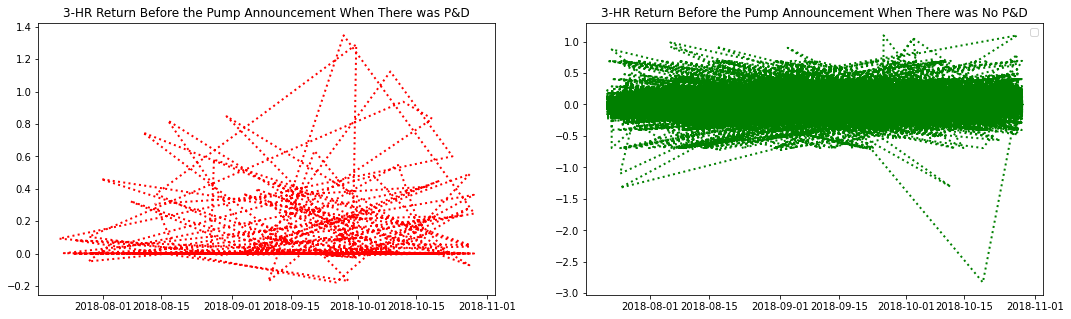

In [29]:
# Make a side by side plot for whether there is a difference between the 3-hour price return before the pump announcement of pumped and not pumped coins

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

w = 18 # width in inch
h = 5 # height in inch

fig = plt.figure(figsize=(w,h))
# using subplot function and creating plot one
plt.subplot(1, 2, 1)


plt.plot(data.loc[data["pumped"]==True, "datetime"], data.loc[data["pumped"]==True,
                                  "return3h"], 'r', linewidth=2, linestyle=':')
plt.title('3-HR Return Before the Pump Announcement When There was P&D')

 
# using subplot function and creating plot two row 1, column 2, count 2
plt.subplot(1, 2, 2)
plt.plot(data.loc[data["pumped"]==False, "datetime"],data.loc[data["pumped"]==False, 
                                   "return3h"], 'g', linewidth=2, linestyle=':')
# plt.title('Price Return When There are Pumps')
plt.title('3-HR Return Before the Pump Announcement When There was No P&D')
plt.legend()
# space between the plots

# show plot
plt.show()

In [31]:
print(data["datetime"].shape)
print(data["volumefrom3h"].shape)


(70239,)
(70239,)


No handles with labels found to put in legend.


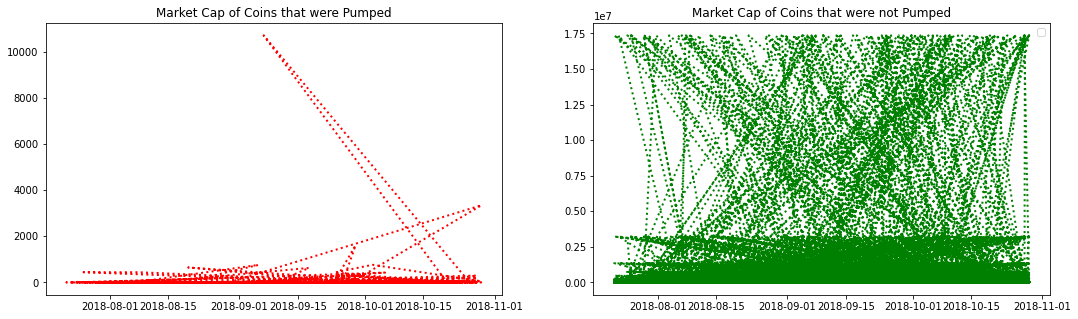

In [46]:
# Make a side by side plot for whether there is a difference between the 
# market cap before the pump announcement of pumped and not pumped coins

w = 18 # width in inch
h = 5 # height in inch

fig = plt.figure(figsize=(w,h))


plt.subplot(1, 2, 1)


plt.plot(data.loc[data["pumped"]==True, "datetime"], data.loc[data["pumped"]==True,
                                  "caps"], 'r', linewidth=2, linestyle=':')
plt.title('Market Cap of Coins that were Pumped')
 
# using subplot function and creating plot two row 1, column 2, count 2
plt.subplot(1, 2, 2)
plt.plot(data.loc[data["pumped"]==False, "datetime"],data.loc[data["pumped"]==False, 
                                   "caps"], 'g', linewidth=2, linestyle=':')
# plt.title('Price Return When There are Pumps')
plt.title('Market Cap of Coins that were not Pumped')
plt.legend()
 
# show plot
plt.show()

No handles with labels found to put in legend.


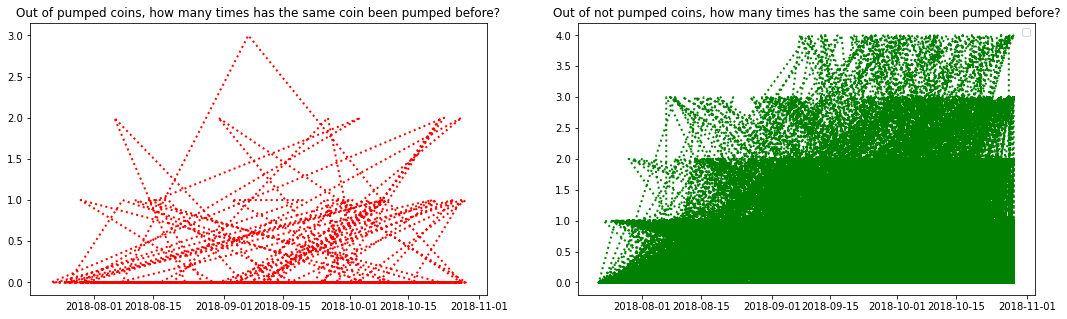

In [49]:


# Visualizing the status of being pumped in the past contributes to being pumped in the future

w = 18 # width in inch
h = 5 # height in inch

fig = plt.figure(figsize=(w,h))


plt.subplot(1, 2, 1)


plt.plot(data.loc[data["pumped"]==True, "datetime"], data.loc[data["pumped"]==True,
                                  "pumpedtimes"], 'r', linewidth=2, linestyle=':')

plt.title("Out of pumped coins, how many times has the same coin been pumped before?")
 
# using subplot function and creating plot two row 1, column 2, count 2
plt.subplot(1, 2, 2)
plt.plot(data.loc[data["pumped"]==False, "datetime"],data.loc[data["pumped"]==False, 
                                   "pumpedtimes"], 'g', linewidth=2, linestyle=':')
plt.title("Out of not pumped coins, how many times has the same coin been pumped before?")
plt.legend()
 
# show plot
plt.show()